# 라이브러리 불러오기

In [134]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import catboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

In [158]:
train = pd.read_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\train.csv')
test = pd.read_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\test.csv')
submission = pd.read_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\sample_submission.csv')

데이터 변수 설명





- index


- gender: 성별


- car: 차량 소유 여부


- reality: 부동산 소유 여부


- child_num: 자녀 수


- income_total: 연간 소득


- income_type: 소득 분류


	['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']






- edu_type: 교육 수준


	['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']






- family_type: 결혼 여부


	['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']






- house_type: 생활 방식


	['Municipal apartment', 'House / apartment', 'With parents',
	 'Co-op apartment', 'Rented apartment', 'Office apartment']






- DAYS_BIRTH: 출생일


	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미






- DAYS_EMPLOYED: 업무 시작일


	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

													

	양수 값은 고용되지 않은 상태를 의미함






- FLAG_MOBIL: 핸드폰 소유 여부


- work_phone: 업무용 전화 소유 여부


- phone: 전화 소유 여부


- email: 이메일 소유 여부


- occyp_type: 직업 유형													


- family_size: 가족 규모


- begin_month: 신용카드 발급 월
			

	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미







- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도


	=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [159]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [160]:
print(train.shape)
print(test.shape)
train.info()

(26457, 20)
(10000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-n

# 데이터 전처리
## 1. 결측치 제거

In [161]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [162]:
train = train.drop('occyp_type', axis = 1)
test = test.drop('occyp_type', axis = 1)

2. Binary variables

In [163]:
train_and_test = [train, test]

In [164]:
for dataset in train_and_test:
    dataset['gender'] = dataset['gender'].replace(['F', 'M'], [0, 1])
    dataset['car'] = dataset['car'].replace(['N', 'Y'], [0, 1])
    dataset['reality'] = dataset['reality'].replace(['N', 'Y'], [0, 1])

## 3. Continuous variables
## - Child_num

<AxesSubplot:>

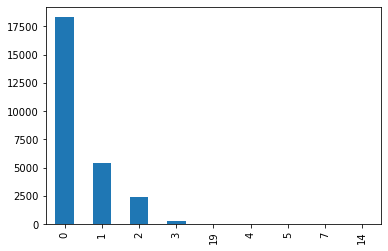

In [165]:
train['child_num'].value_counts(sort=False).plot.bar()

In [166]:
for dataset in train_and_test:
    dataset.loc[dataset['child_num']>=2, 'child_num'] = 2

(2.544, 18.18]      16212
(18.18, 33.66]       8330
(33.66, 49.14]       1530
(49.14, 64.62]        206
(64.62, 80.1]         121
(80.1, 95.58]          44
(95.58, 111.06]         3
(111.06, 126.54]        2
(126.54, 142.02]        4
(142.02, 157.5]         5
Name: income_total, dtype: int64


<AxesSubplot:ylabel='Frequency'>

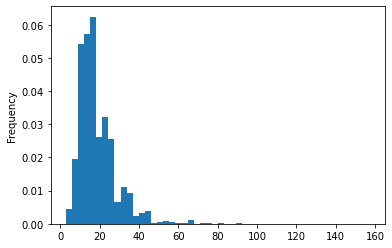

In [167]:
for dataset in train_and_test:
    dataset['income_total'] = dataset['income_total'].astype(object)
    dataset['income_total'] = dataset['income_total']/10000

print(train['income_total'].value_counts(bins = 10, sort = False))
train['income_total'].plot(kind = 'hist', bins = 50, density = True)

In [168]:
count, bin_divider = np.histogram(dataset['income_total'], bins = 7)
bin_names = ['소득'+str(i) for i in range (7)]

for dataset in train_and_test:
    dataset['income_total'] = pd.cut(x = dataset['income_total'], bins = bin_divider, labels = bin_names, include_lowest=True)

In [169]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,소득0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,2.0,-60.0
1,26458,0,0,1,0,소득0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,2.0,-36.0
2,26459,0,0,1,0,소득0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,2.0,-40.0
3,26460,1,1,0,0,소득0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,2.0,-41.0
4,26461,0,1,1,0,소득0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,소득0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,2.0,-19.0
9996,36453,1,1,1,0,소득0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,2.0,-34.0
9997,36454,0,0,1,0,소득1,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,2.0,-55.0
9998,36455,0,1,0,0,소득0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,2.0,-33.0


## - Discrete variables

In [170]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [171]:
train['family_size'] = train['family_size'].replace([5.0, 6.0, 7.0, 9.0, 15.0, 20.0], 4)

In [172]:
train['family_size'].value_counts()

2.0    14106
1.0     5109
3.0     4632
4.0     2610
Name: family_size, dtype: int64

## - Type

In [173]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['family_type'].unique())
print(train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [174]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for feature in ['income_type', 'edu_type', 'family_type', 'house_type', 'income_total']:
    train[feature] = label_encoder.fit_transform(train[feature])
    test[feature] = label_encoder.transform(test[feature])

## - Minus continuous variable

In [175]:
# def divide(feature, num):
#     for dataset in train_and_test:
#         for i in range(num):
#             bins = []
#             labels = []
#             Q_i = dataset[feature].quantile(float(i+1/(num)))
#             bins.append(Q_i)
#             labels.append(i)
#         cuts = pd.cut(dataset[feature], bins = bins, right = True, labels = labels, include_lowest = True)
#         dataset[feature] = cuts

#     return dataset[feature]

In [176]:
# divide('DAYS_BIRTH', 10)

## DAYS_EMPLOYED
### 근무일수 데이터 중 양수의 값을 가지는 데이터를 0->Unemployed로 바꾼 후 각 분위에 해당하는 데이터를 'Short', 'Medium', 'Long', 'Very_Long'로 변환함.

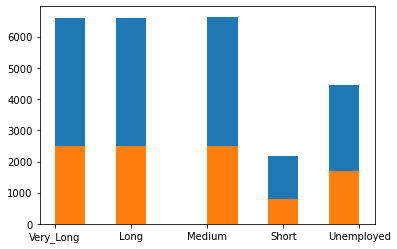

In [177]:
# 'DAYS_EMPLOYED' preprocessing
for dataset in train_and_test:
    dataset['DAYS_EMPLOYED'] = dataset['DAYS_EMPLOYED'].replace(365243, 0)
    dataset['DAYS_EMPLOYED'] = dataset['DAYS_EMPLOYED'].abs()

    Q1 = dataset['DAYS_EMPLOYED'].quantile(0.25)
    Q2 = dataset['DAYS_EMPLOYED'].quantile(0.50)
    Q3 = dataset['DAYS_EMPLOYED'].quantile(0.75)

    bins = [0,1, Q1, Q2, Q3, 15713]
    labels = ['Unemployed', 'Short', 'Medium', 'Long', 'Very_Long']
    cuts = pd.cut(dataset['DAYS_EMPLOYED'], bins, right=True, labels=labels, include_lowest= True)
    dataset['DAYS_EMPLOYED'] = cuts

    plt.hist(dataset['DAYS_EMPLOYED'])

In [178]:
test['DAYS_EMPLOYED'].isnull().sum()

0

## DAYS_BIRTH
### 살아온 일수를 절대값을 취한 후 연단위로 바꾸어 반올림함.

In [179]:
# train['DAYS_BIRTH'] = round(train['DAYS_BIRTH']/365).abs()
# plt.hist(train['DAYS_BIRTH'])

In [180]:
# train['DAYS_BIRTH'].describe()

In [181]:
train['DAYS_BIRTH'] = round(train['DAYS_BIRTH']/365).abs()

In [182]:
test['DAYS_BIRTH'] = round(test['DAYS_BIRTH']/365).abs()

In [183]:
for dataset in train_and_test:
    # dataset['DAYS_BIRTH'] = round(dataset['DAYS_BIRTH']/365).abs()
    bins = [20, 30, 40, 50, 60, 70]
    labels = ['20s', '30s', '40s', '50s', '60s']
    cuts = pd.cut(dataset['DAYS_BIRTH'], bins = bins, right=True, labels=labels, include_lowest= True)
    dataset['DAYS_BIRTH'] = cuts

In [186]:
train['DAYS_BIRTH'].value_counts()
train['DAYS_BIRTH'].isnull().sum()

0

In [188]:
test['DAYS_BIRTH'].value_counts()
test['DAYS_BIRTH'].isnull().sum()

0

(array([2197.,    0., 2513.,    0.,    0., 2827.,    0.,  984.,    0.,
        1479.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

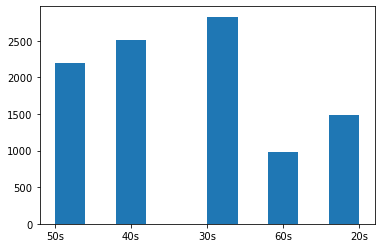

In [190]:
plt.hist(test['DAYS_BIRTH'])

## begin_month
### 음수 값을 가진 데이터를 절대값을 취해주었으며, 0의 값을 가진 데이터의 경우 카드를 소지하지 않은 경우로 판단함.

In [103]:
# train['begin_month'].describe()

In [104]:
# train['begin_month'].head()
# train['begin_month'].describe() # 0의 값이 존재함 -> 어떤 의미? -> 카드를 발급받지 아니한 사람 (사유: 다양함 --> 신용불량, 소득 X, 신용등급이 낮은 사회 초년생 등)
# train['begin_month'].isnull().sum() # 결측치 없음
# len(train.loc[train['begin_month'] == 0, :]) # 카드를 소지하지 않은 사람의 수가 231명으로 보임.

In [105]:
# train['begin_month'] = train['begin_month'].abs()/12 # 음수 값을 가지던 데이터에 절대값처리.

In [106]:
# train['begin_month'].value_counts

In [107]:
# bins = [0, 0.001, 1, 2, 3, 4, 5]
# labels = ['NoCard', '0_year', '1_year', '2_year', '3_year', '4+_years']
# cuts = pd.cut(train['begin_month'], bins = bins, right=True, labels=labels, include_lowest= True)
# train['begin_month'] = cuts
# train['begin_month'].value_counts()


In [191]:
for dataset in train_and_test:
    dataset['begin_month'] = dataset['begin_month'].abs()/12
    bins = [0, 0.001, 1, 2, 3, 4, 5]
    labels = ['NoCard', '0_year', '1_year', '2_year', '3_year', '4+_years']
    cuts = pd.cut(dataset['begin_month'], bins = bins, right=True, labels=labels, include_lowest= True)
    dataset['begin_month'] = cuts
    dataset['begin_month'].value_counts()

In [192]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,0,1,4,0,1,50s,Unemployed,1,0,1,0,2.0,4+_years
1,26458,0,0,1,0,0,2,1,1,1,50s,Very_Long,1,0,1,0,2.0,2_year
2,26459,0,0,1,0,0,4,4,1,1,40s,Short,1,1,1,0,2.0,3_year
3,26460,1,1,0,0,0,0,4,1,1,50s,Long,1,1,0,0,2.0,3_year
4,26461,0,1,1,0,0,2,1,1,1,40s,Very_Long,1,1,0,0,2.0,0_year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,50s,Very_Long,1,1,1,0,2.0,1_year
9996,36453,1,1,1,0,0,4,4,0,1,20s,Medium,1,1,0,0,2.0,2_year
9997,36454,0,0,1,0,1,4,4,1,1,50s,Very_Long,1,0,0,0,2.0,4+_years
9998,36455,0,1,0,0,0,0,4,1,1,40s,Medium,1,0,1,0,2.0,2_year


In [107]:
print(train.shape)
print(test.shape)

(26457, 19)
(10000, 18)


# [데이터 모델링]

In [108]:
train_x = train.drop('credit', axis = 1)
train_y = train[['credit']]
test_x = test

In [109]:
print(train_x.shape, train_y.shape, test.shape)

(26457, 18) (26457, 1) (10000, 18)


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

Train set: 
(19842, 18)
(19842, 1)
Validation set: 
(6615, 18)
(6615, 1)


In [111]:
# rf_clf=RandomForestClassifier()
# rf_clf.fit(X_train, y_train)
# y_pred_rf=rf_clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_rf)}")

log_loss: 1.0652891195659049


In [112]:
# gbm_clf=GradientBoostingClassifier()
# gbm_clf.fit(X_train, y_train)
# y_pred_gbm=gbm_clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_gbm)}")

log_loss: 0.8597575377955686


In [113]:
# ada_clf=AdaBoostClassifier()
# ada_clf.fit(X_train, y_train)
# y_pred_ada=ada_clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_ada)}")

log_loss: 1.0885676567773188


In [ ]:
cbt_clf = CatBoostClassifier()
cbt_clf.fit(X_train, y_train)
y_pred_cbt = cbt_clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred_cbt)}")

In [114]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(cbt_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        cbt_clf.fit(X_train, y_train)
        
        predictions=cbt_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=cbt_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cbt_clf)

FOLD 0 : logloss:0.8614496329100471
FOLD 1 : logloss:0.8574222167066592
FOLD 2 : logloss:0.8599792535957571
FOLD 3 : logloss:0.8632032834659836
FOLD 4 : logloss:0.858770481199438
Mean:0.8601649735755771


In [115]:
my_submission

array([[0.04572778, 0.15117469, 0.80309753],
       [0.03976803, 0.1736463 , 0.78658567],
       [0.03300677, 0.22615808, 0.74083515],
       ...,
       [0.0746023 , 0.28819725, 0.63720045],
       [0.20667581, 0.10066723, 0.69265696],
       [0.06312125, 0.18565482, 0.75122392]])

In [116]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [117]:
submission.loc[:, 1:] = my_submission

In [118]:
submission

,index,0,1,2
0,26457,0.045728,0.151175,0.803098
1,26458,0.039768,0.173646,0.786586
2,26459,0.033007,0.226158,0.740835
3,26460,0.230972,0.140486,0.628542
4,26461,0.048883,0.203437,0.747680
...,...,...,...,...
9995,36452,0.043620,0.235427,0.720953
9996,36453,0.042847,0.234898,0.722255
9997,36454,0.074602,0.288197,0.637200
9998,36455,0.206676,0.100667,0.692657


In [119]:
# submission.to_csv(r'C:\Users\kwctl\Desktop\CreditCard\Ubion-CreditCardUserPrediction\Data\submission_JH_5.csv', index=False)